### Analysis of Epinions Data

We are provided with the Epinions data collected through a general consumer review web site Epinions.com. Each user on the site can rate and post a review for products (items) and other users would rate the review to show the helpfulness of the review.
In this data, for each user, we have user ID, gender, ratings (1-5) and reviews towards the products they bought. For each rating, we have the product name and its category, the rating score, the time point when the rating is created, and the helpfulness (1-6) of this rating.

Originally, there are several separate files to record the user-item rating info, user demographic info and item descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'Epinions_test_data.csv'. The header of the csv file is shown below. 


| userId | gender | rating | review| item | category | helpfulness | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __item__ - the product's name
* __category__ - the category of the item
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __helpfulness__ - the helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created

Note that, a same user (i.e., a same userId) corresponds to a same gender; a same item corresponds to a same category; a same user (i.e., a same userId) may rate multiple items; a same item may receive ratings and reviews from multiple users and each review is associted with a single helpfulness value calculated based on the feedbacks from other users.

There are four questions to explore with the data as shown below.

In [1]:
# Importing library
import pandas as pd
import matplotlib.pyplot as plt

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [2]:
# Reading csv file
ep_df = pd.read_csv('Epinions_test_data.csv')

# Display dataframe
display(ep_df)

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance
...,...,...,...,...,...,...,...,...
9995,5212,F,Perfect Storm,4.0,Fantastic Special Effects,3.0,81000,Movies
9996,5212,F,What Lies Beneath,2.0,Very Predictable,1.0,81000,Movies
9997,5319,M,Gladiator,5.0,The best ever movie made,4.0,122500,Movies
9998,5319,F,The Sims 2: Open for Business for Windows,5.0,Sims - build your dream city,6.0,122500,Games


In [3]:
# Counting numbers of null values in each columns
print(ep_df.isnull().sum())

userId          0
gender         27
item            0
rating         31
review          0
helpfulness    26
timestamp       0
category        0
dtype: int64


In [4]:
# Display length of the data before removing any data
print(ep_df.shape)

(10000, 8)


In [5]:
# Removing records whose gender/rating/helpfulness is missing
clean_ep_df = ep_df.dropna(subset=['gender', 'rating','helpfulness'])
clean_ep_df

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance
...,...,...,...,...,...,...,...,...
9995,5212,F,Perfect Storm,4.0,Fantastic Special Effects,3.0,81000,Movies
9996,5212,F,What Lies Beneath,2.0,Very Predictable,1.0,81000,Movies
9997,5319,M,Gladiator,5.0,The best ever movie made,4.0,122500,Movies
9998,5319,F,The Sims 2: Open for Business for Windows,5.0,Sims - build your dream city,6.0,122500,Games


In [6]:
# Displaying size/length after removing
print(clean_ep_df.shape)

(9916, 8)


In [7]:
# Removing records whose review is 'none'
clean_df_review = ep_df.drop(ep_df.index[ep_df.review == 'none'])
clean_df_review

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance
...,...,...,...,...,...,...,...,...
9995,5212,F,Perfect Storm,4.0,Fantastic Special Effects,3.0,81000,Movies
9996,5212,F,What Lies Beneath,2.0,Very Predictable,1.0,81000,Movies
9997,5319,M,Gladiator,5.0,The best ever movie made,4.0,122500,Movies
9998,5319,F,The Sims 2: Open for Business for Windows,5.0,Sims - build your dream city,6.0,122500,Games


In [8]:
# Displaying size/length after removing
print(clean_df_review.shape)

(9973, 8)


In [9]:
# Displaying length after removing both (review-none and gender/rating/helpfulness-missing value)
clean_ep_data = clean_ep_df.drop(clean_ep_df.index[clean_ep_df.review == 'none'])
display(clean_ep_data)

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance
...,...,...,...,...,...,...,...,...
9995,5212,F,Perfect Storm,4.0,Fantastic Special Effects,3.0,81000,Movies
9996,5212,F,What Lies Beneath,2.0,Very Predictable,1.0,81000,Movies
9997,5319,M,Gladiator,5.0,The best ever movie made,4.0,122500,Movies
9998,5319,F,The Sims 2: Open for Business for Windows,5.0,Sims - build your dream city,6.0,122500,Games


In [10]:
# Displaying final size/length after removing
print(clean_ep_data.shape)

(9890, 8)


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [11]:
# Q2.1 Total number of unique users, unique reviews, unique items, and unique categories
print("Unique Users: " + str(clean_ep_data["userId"].nunique()))
print("Unique Reviews: " + str(clean_ep_data["review"].nunique()))
print("Unique Items: " + str(clean_ep_data["item"].nunique()))
print("Unique Category: " + str(clean_ep_data["category"].nunique()))

Unique Users: 4326
Unique Reviews: 9727
Unique Items: 89
Unique Category: 9


In [12]:
# Q2.2 Descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
clean_ep_data["rating"].describe()

count    9890.000000
mean        3.701517
std         1.387026
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [13]:
# Q2.3 Descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
gender_ep_data = clean_ep_data.groupby("gender").count()["item"].reset_index(name="count")
gender_ep_data

,gender,count
0,F,5025
1,M,4865


In [14]:
# Descriptive statistics
gender_ep_data['count'].describe()

count       2.000000
mean     4945.000000
std       113.137085
min      4865.000000
25%      4905.000000
50%      4945.000000
75%      4985.000000
max      5025.000000
Name: count, dtype: float64

In [15]:
# Q2.4 Descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
clean_ep_data.groupby("item").count()["rating"]

item
AOL (America Online)     446
All Advantage            306
Alta Vista (by 1stUp)     84
Amazon.com               110
American Airlines         92
                        ... 
Wendy's                   88
What Lies Beneath         85
X-Men                    121
X.com                     93
eBay                     295
Name: rating, Length: 89, dtype: int64

In [16]:
# In tabular form
item_ep_data = clean_ep_data.groupby("item").count()["rating"].reset_index(name = "count")
item_ep_data

,item,count
0,AOL (America Online),446
1,All Advantage,306
2,Alta Vista (by 1stUp),84
3,Amazon.com,110
4,American Airlines,92
...,...,...
84,Wendy's,88
85,What Lies Beneath,85
86,X-Men,121
87,X.com,93


In [17]:
# Descriptive statistics for item
item_ep_data['count'].describe()

count     89.000000
mean     111.123596
std       55.955709
min       60.000000
25%       82.000000
50%       92.000000
75%      121.000000
max      446.000000
Name: count, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [18]:
# Clean data display
clean_ep_data

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
1,10222,M,NetFlix,2.0,Don't Bother Unless you live in a remote area,2.0,41604,Online Stores & Services
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance
...,...,...,...,...,...,...,...,...
9995,5212,F,Perfect Storm,4.0,Fantastic Special Effects,3.0,81000,Movies
9996,5212,F,What Lies Beneath,2.0,Very Predictable,1.0,81000,Movies
9997,5319,M,Gladiator,5.0,The best ever movie made,4.0,122500,Movies
9998,5319,F,The Sims 2: Open for Business for Windows,5.0,Sims - build your dream city,6.0,122500,Games


<AxesSubplot:title={'center':'rating'}, xlabel='gender'>

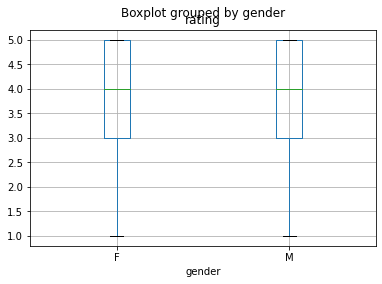

In [19]:
# Box-plot display of rating-gender correlation
clean_ep_data.boxplot("rating", by = "gender")

<AxesSubplot:title={'center':'rating'}, xlabel='helpfulness'>

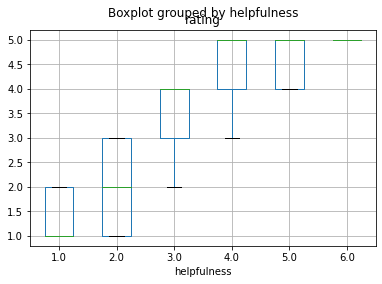

In [20]:
# Box-plot display of rating-helpfulness correlation
clean_ep_data.boxplot("rating", by = "helpfulness")

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Books'),
  Text(2, 0, 'Games'),
  Text(3, 0, 'Hotels & Travel'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Media'),
  Text(6, 0, 'Movies'),
  Text(7, 0, 'Online Stores & Services'),
  Text(8, 0, 'Personal Finance'),
  Text(9, 0, 'Restaurants & Gourmet')])

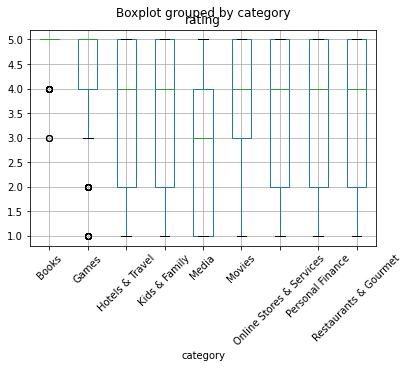

In [21]:
# Box-plot display of ratings-category correlation
clean_ep_data.boxplot("rating", by = "category")
plt.xticks(rotation = 45)

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [22]:
# Reviews of which the helpfulness is no more than 2
clean_ep = clean_ep_data.drop(clean_ep_data.index[clean_ep_data["helpfulness"]<=2])
clean_ep

,userId,gender,item,rating,review,helpfulness,timestamp,category
0,1324,F,NBC,5.0,They made it after all....,4.0,21400,Media
2,2777,M,Toy Story 2,4.0,Good for adults and children,4.0,10200,Movies
3,11763,M,Fight Club,5.0,I wish I wasn't hesitant about this movie,4.0,70100,Movies
4,6003,M,Quicken Loans,5.0,Used Quicken Loans to save time and money on r...,5.0,72103,Personal Finance
5,9525,M,Outback Steakhouse,4.0,"Good choice for a reasonably priced, quality s...",3.0,22810,Restaurants & Gourmet
...,...,...,...,...,...,...,...,...
9993,1599,M,All Advantage,2.0,Money For &quot;Nothing&quot;,3.0,102200,Online Stores & Services
9994,1599,M,Google,5.0,Google: Simplicity is Golden,4.0,102400,Online Stores & Services
9995,5212,F,Perfect Storm,4.0,Fantastic Special Effects,3.0,81000,Movies
9997,5319,M,Gladiator,5.0,The best ever movie made,4.0,122500,Movies


In [23]:
# Group users by userId and given rating counts
ep_data1 = clean_ep.groupby("userId").count()["item"].reset_index(name = "count")
ep_data1

,userId,count
0,3,3
1,4,3
2,7,1
3,10,1
4,12,1
...,...,...
3662,15720,1
3663,15723,1
3664,15726,5
3665,15727,1


In [24]:
# Users who rate less than 7 items
user_rate_less7 = ep_data1[ep_data1["count"]<7]["userId"].tolist()

# Removing users who rate less than 7 items
clean_ep = clean_ep.drop(clean_ep.index[clean_ep["userId"].isin(user_rate_less7)])
clean_ep

,userId,gender,item,rating,review,helpfulness,timestamp,category
65,10729,F,NetZero,4.0,Good service,4.0,41201,Online Stores & Services
66,10729,F,BlueLight.com,3.0,Still holding on,3.0,41201,Online Stores & Services
67,10729,M,Shrek,5.0,Shrek is shrieking good fun,5.0,82101,Movies
68,10729,F,Amazon.com,4.0,Amazon.com is now a GIANT!,3.0,82301,Online Stores & Services
69,10729,M,MyPoints.com,4.0,It's great!,5.0,92500,Online Stores & Services
...,...,...,...,...,...,...,...,...
9865,1154,M,"South Park: Bigger, Longer & Uncut",5.0,"South Park: Bigger, Longer, & Uncut: Bill Gate...",4.0,11300,Movies
9866,1154,F,PayPal,4.0,Beamed me $10 over and over again,5.0,22500,Personal Finance
9867,1154,M,X.com,2.0,Dear Mr. Harris,3.0,111900,Personal Finance
9868,1154,F,MyPoints.com,4.0,"50,000 points (about $500) and counting, (3/14...",4.0,120299,Online Stores & Services


In [25]:
# Counting the number of items by their ratings and displaying it in a tabular form
item_data = clean_ep.groupby("item").count()["rating"].reset_index(name = "count")
item_data

,item,count
0,AOL (America Online),26
1,All Advantage,29
2,Alta Vista (by 1stUp),3
3,Amazon.com,10
4,American Airlines,9
...,...,...
84,Wendy's,14
85,What Lies Beneath,12
86,X-Men,31
87,X.com,7


In [26]:
# Displaying the items which have received less than 11 ratings
item_rating_less11 = item_data[item_data["count"]<11]["item"].tolist()
item_rating_less11

['Alta Vista (by 1stUp)',
 'Amazon.com',
 'American Airlines',
 'Any Given Sunday',
 "Applebee's",
 'Bank of America',
 'BlueLight.com',
 'Crouching Tiger, Hidden Dragon',
 'Deep Blue Sea',
 'Diablo 2 - Bestseller Series for Windows',
 'Earthlink',
 'Golden Eye 007 for Nintendo 64',
 'Google',
 'Huggies Ultra Trim Diapers',
 'Luvs Ultra Leakguards Stretch',
 'MTV',
 'NetFlix',
 'Northwest Airlines',
 'Playtex Diaper Genie System',
 'Priceline Flight Reservations',
 'Quicken Loans',
 'Road Runner (includes MediaOne)',
 'Roller Coaster Tycoon For Windows',
 'Sega Dreamcast Grey Console',
 'Sony PlayStation 2 Slimline Console',
 'Spedia',
 'Teletubbies',
 'The Legend Of Zelda Ocarina Of Time for Nintendo 64',
 'The Original Furby',
 'Treeloot.com',
 'United Airlines',
 'X.com']

In [27]:
# Dropping the items which have recieved less than 11 ratings
clean_ep = clean_ep.drop(clean_ep.index[clean_ep["item"].isin(item_rating_less11)])
clean_ep

,userId,gender,item,rating,review,helpfulness,timestamp,category
65,10729,F,NetZero,4.0,Good service,4.0,41201,Online Stores & Services
67,10729,M,Shrek,5.0,Shrek is shrieking good fun,5.0,82101,Movies
69,10729,M,MyPoints.com,4.0,It's great!,5.0,92500,Online Stores & Services
70,10729,M,Erin Brockovich,5.0,Great Film,6.0,102500,Movies
71,10729,M,How the Grinch Stole Christmas,5.0,Put me in the Christmas Spirit,5.0,112200,Movies
...,...,...,...,...,...,...,...,...
9815,12167,M,NetZero,5.0,A fair price,5.0,71000,Online Stores & Services
9817,12167,F,Erin Brockovich,4.0,A new twist,4.0,100700,Movies
9865,1154,M,"South Park: Bigger, Longer & Uncut",5.0,"South Park: Bigger, Longer, & Uncut: Bill Gate...",4.0,11300,Movies
9866,1154,F,PayPal,4.0,Beamed me $10 over and over again,5.0,22500,Personal Finance


In [28]:
# Displaying the final size of the data after performing all the operations
clean_ep.shape

(1080, 8)

In [29]:
# Exporting the data
clean_ep.to_csv("clean_ep_data.csv", index = False)